In [ ]:
#Assignment 5 Q2 
#Toyota Problem

Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)




In [16]:
#Importing the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [19]:
#Loading the data
df=pd.read_excel("ToyotaCorolla.xlsx")
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [20]:
df.shape

(1436, 38)

In [21]:
df.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [22]:
df.drop(columns=["Id","Model","Color"],inplace=True)

In [23]:
df

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,Diesel,90,1,0,2000,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,Diesel,90,1,0,2000,...,1,0,1,0,0,0,1,0,0,0
2,13950,24,9,2002,41711,Diesel,90,1,0,2000,...,0,0,1,0,0,0,1,0,0,0
3,14950,26,7,2002,48000,Diesel,90,0,0,2000,...,0,0,1,0,0,0,1,0,0,0
4,13750,30,3,2002,38500,Diesel,90,0,0,2000,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,Petrol,86,1,0,1300,...,1,1,1,0,1,1,1,0,0,0
1432,10845,72,9,1998,19000,Petrol,86,0,0,1300,...,0,0,1,0,0,1,1,0,0,0
1433,8500,71,10,1998,17016,Petrol,86,0,0,1300,...,0,0,1,0,0,0,1,0,0,0
1434,7250,70,11,1998,16916,Petrol,86,1,0,1300,...,0,0,0,0,0,0,1,0,0,0


In [24]:
df.columns

Index(['Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'Fuel_Type', 'HP',
       'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears',
       'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')

In [25]:
df.drop(columns=['Mfg_Month'],inplace=True)

In [26]:
df

,Price,Age_08_04,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,2002,46986,Diesel,90,1,0,2000,3,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,2002,72937,Diesel,90,1,0,2000,3,...,1,0,1,0,0,0,1,0,0,0
2,13950,24,2002,41711,Diesel,90,1,0,2000,3,...,0,0,1,0,0,0,1,0,0,0
3,14950,26,2002,48000,Diesel,90,0,0,2000,3,...,0,0,1,0,0,0,1,0,0,0
4,13750,30,2002,38500,Diesel,90,0,0,2000,3,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,1998,20544,Petrol,86,1,0,1300,3,...,1,1,1,0,1,1,1,0,0,0
1432,10845,72,1998,19000,Petrol,86,0,0,1300,3,...,0,0,1,0,0,1,1,0,0,0
1433,8500,71,1998,17016,Petrol,86,0,0,1300,3,...,0,0,1,0,0,0,1,0,0,0
1434,7250,70,1998,16916,Petrol,86,1,0,1300,3,...,0,0,0,0,0,0,1,0,0,0


In [27]:
df["Fuel_Type"]=df["Fuel_Type"].astype("category")

In [28]:
df["Fuel_Type"].dtypes

CategoricalDtype(categories=['CNG', 'Diesel', 'Petrol'], ordered=False)

In [29]:
#Creating dummies
df=pd.get_dummies(df,columns=["Fuel_Type"])

In [31]:
df.columns

Index(['Price', 'Age_08_04', 'Mfg_Year', 'KM', 'HP', 'Met_Color', 'Automatic',
       'cc', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight',
       'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS',
       'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer',
       'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering',
       'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol'],
      dtype='object')

In [32]:
y=df[["Price"]]

In [33]:
x=df.drop(columns=["Price"])

In [34]:
x

,Age_08_04,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,2002,46986,90,1,0,2000,3,4,5,...,0,0,0,1,0,0,0,0,1,0
1,23,2002,72937,90,1,0,2000,3,4,5,...,0,0,0,1,0,0,0,0,1,0
2,24,2002,41711,90,1,0,2000,3,4,5,...,0,0,0,1,0,0,0,0,1,0
3,26,2002,48000,90,0,0,2000,3,4,5,...,0,0,0,1,0,0,0,0,1,0
4,30,2002,38500,90,0,0,2000,3,4,5,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,69,1998,20544,86,1,0,1300,3,4,5,...,0,1,1,1,0,0,0,0,0,1
1432,72,1998,19000,86,0,0,1300,3,4,5,...,0,0,1,1,0,0,0,0,0,1
1433,71,1998,17016,86,0,0,1300,3,4,5,...,0,0,0,1,0,0,0,0,0,1
1434,70,1998,16916,86,1,0,1300,3,4,5,...,0,0,0,1,0,0,0,0,0,1


In [35]:
x[["Year_old"]]=2022-x[["Mfg_Year"]]

In [36]:
x.columns

Index(['Age_08_04', 'Mfg_Year', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight',
       'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS',
       'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer',
       'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering',
       'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Year_old'],
      dtype='object')

In [37]:
x.drop(columns=["Mfg_Year"],inplace=True)

In [38]:
x

,Age_08_04,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,...,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Year_old
0,23,46986,90,1,0,2000,3,4,5,210,...,0,0,1,0,0,0,0,1,0,20
1,23,72937,90,1,0,2000,3,4,5,210,...,0,0,1,0,0,0,0,1,0,20
2,24,41711,90,1,0,2000,3,4,5,210,...,0,0,1,0,0,0,0,1,0,20
3,26,48000,90,0,0,2000,3,4,5,210,...,0,0,1,0,0,0,0,1,0,20
4,30,38500,90,0,0,2000,3,4,5,210,...,1,0,1,0,0,0,0,1,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1,0,1300,3,4,5,69,...,1,1,1,0,0,0,0,0,1,24
1432,72,19000,86,0,0,1300,3,4,5,69,...,0,1,1,0,0,0,0,0,1,24
1433,71,17016,86,0,0,1300,3,4,5,69,...,0,0,1,0,0,0,0,0,1,24
1434,70,16916,86,1,0,1300,3,4,5,69,...,0,0,1,0,0,0,0,0,1,24


In [39]:
x.columns

Index(['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Year_old'],
      dtype='object')

In [40]:
x.isnull().sum()

Age_08_04           0
KM                  0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
Fuel_Type_CNG       0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
Year_old            0
dtype: int64

In [41]:
y.isnull().sum()

Price    0
dtype: int64

C:\Users\palle\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HP'>

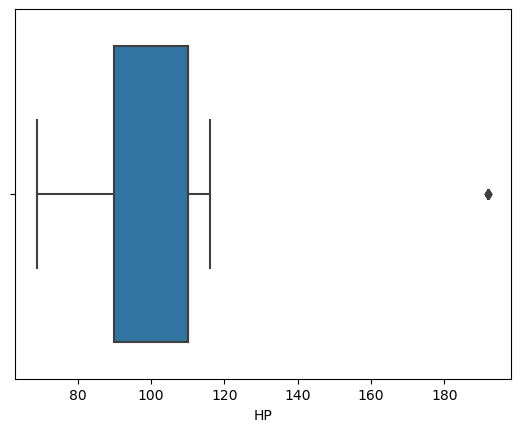

In [42]:
sns.boxplot(x["HP"],orient="h")

In [43]:
#Solving outlier by using median
x["HP"]=x["HP"].fillna(x["HP"].median())

In [44]:
x.isnull().sum()

Age_08_04           0
KM                  0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
Fuel_Type_CNG       0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
Year_old            0
dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [46]:
x_train

,Age_08_04,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,...,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Year_old
1057,78,176000,86,0,0,1300,5,4,5,69,...,0,0,1,0,0,0,0,0,1,24
276,39,46821,97,1,0,1400,5,4,5,85,...,0,0,1,0,0,1,0,0,1,21
418,55,94401,72,0,0,2000,3,4,5,185,...,0,1,1,0,0,0,0,1,0,22
269,39,48945,110,0,0,1600,3,4,5,69,...,0,0,1,0,0,1,0,0,1,21
615,67,149000,90,1,0,2000,5,4,5,64,...,1,0,0,0,0,0,0,1,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,67,79762,86,1,0,1300,3,4,5,69,...,0,0,1,0,0,0,0,0,1,23
835,67,67762,110,1,0,1600,3,4,6,85,...,1,1,1,1,1,0,0,0,1,23
1216,70,85864,72,1,0,2000,5,4,5,185,...,0,1,1,0,0,1,0,1,0,24
559,50,39706,110,1,0,1600,5,4,5,85,...,1,0,1,0,0,0,0,0,1,22


In [47]:
y_train

,Price
1057,6500
276,13450
418,8950
269,10950
615,6250
...,...
763,9130
835,9750
1216,8500
559,13500


In [ ]:
# Before removing colinearity, checking the accuracy

In [48]:
model_p=LinearRegression()

In [49]:
model_p.fit(x_train,y_train)

LinearRegression()

In [50]:
model_p.score(x_test,y_test)

0.5047360424289835

In [51]:
model_p.score(x_train,y_train)

0.9217943985035661

In [ ]:
#Here without removing colinearity model score is only 49%. So we will try to improve the accuracy

In [52]:
x.corr()

,Age_08_04,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,...,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Year_old
Age_08_04,1.000000,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.198431,...,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720,0.002389,-0.097740,0.092611,0.983661
KM,0.505672,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,NaN,0.015023,0.278165,...,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153,0.144016,0.403060,-0.433160,0.504974
HP,-0.156622,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,NaN,0.209477,-0.298432,...,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271,0.062109,-0.533453,0.489110,-0.164697
Met_Color,-0.108150,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,NaN,0.018601,0.011326,...,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536,0.021009,-0.012420,0.004872,-0.103310
Automatic,0.031717,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,NaN,-0.098555,-0.055371,...,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786,0.001486,-0.084490,0.080249,0.033567
cc,-0.098084,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,NaN,0.014629,0.306996,...,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725,0.005941,0.327723,-0.315170,-0.091892
Doors,-0.148359,-0.036197,0.092424,0.085243,-0.027654,0.079903,1.000000,NaN,-0.160141,0.109363,...,0.064705,-0.129881,-0.022542,-0.039555,-0.008265,0.102292,0.009680,0.025495,-0.027589,-0.151442
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.005364,0.015023,0.209477,0.018601,-0.098555,0.014629,-0.160141,NaN,1.000000,-0.005452,...,0.238789,0.174117,0.076705,0.295077,0.015397,-0.029357,-0.049537,-0.048847,0.063182,-0.007766
Quarterly_Tax,-0.198431,0.278165,-0.298432,0.011326,-0.055371,0.306996,0.109363,NaN,-0.005452,1.000000,...,0.024024,0.067525,0.198419,-0.011965,-0.031009,-0.004988,0.233791,0.792726,-0.835452,-0.193934


In [53]:
#Checking co linearity using VIF

columns=x.columns

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
# x.values

vif["features"]=x.columns

C:\Users\palle\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\palle\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [56]:
vif

,VIF Factor,features
0,33.808773,Age_08_04
1,2.086247,KM
2,2.553332,HP
3,1.143778,Met_Color
4,1.116057,Automatic
5,1.256704,cc
6,1.351208,Doors
7,0.000000,Cylinders
8,1.271113,Gears
9,5.203985,Quarterly_Tax


In [57]:
col_var=vif[vif["VIF Factor"]>33].features

In [58]:
x_train=x_train.drop(col_var,axis=1)

In [59]:
x_test=x_test.drop(col_var,axis=1)

In [60]:
model_P_vif=LinearRegression()

In [61]:
model_P_vif.fit(x_train,y_train)

LinearRegression()

In [62]:
model_P_vif.score(x_test,y_test)

0.7738468051022539

In [63]:
model_P_vif.score(x_train,y_train)

0.9183074598607138

In [ ]:
#Here the model accuracy is improved using removing collinearity and model is now 77% accurate. Now we will make more accurate models using StatsModel of Multi Linear Regression.

In [ ]:
# Using Stats Model and improving accuracy

In [65]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load data
Corolla = pd.read_excel("ToyotaCorolla.xlsx")


In [66]:
# Select relevant columns
Corolla = Corolla[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]


In [67]:
# Check for missing values and handle them
Corolla.isnull().sum()
Corolla.dropna(inplace=True)

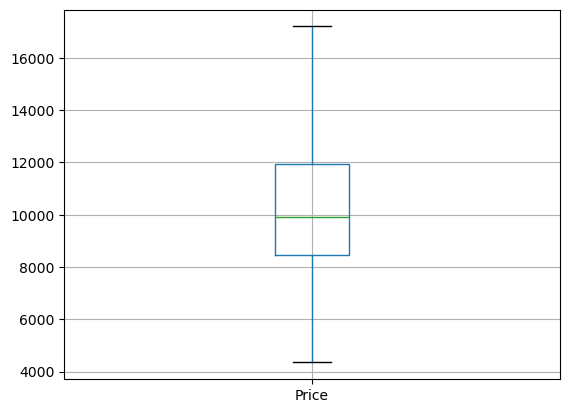

In [68]:
# Perform EDA
# for example, use boxplot to visualize the distribution of Price
Corolla.boxplot(column='Price',showfliers=False)
plt.show()

In [69]:
# Remove Outliers
Q1 = Corolla.quantile(0.25)
Q3 = Corolla.quantile(0.75)
IQR = Q3 - Q1
Corolla = Corolla[~((Corolla < (Q1 - 1.5 * IQR)) | (Corolla > (Q3 + 1.5 * IQR))).any(axis=1)]

In [70]:
# Split data into predictor variables (X) and response variable (y)
X = Corolla[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
y = Corolla["Price"]

In [71]:
# Add a constant to X for the intercept term
X = sm.add_constant(X)

In [72]:
# Fit a linear regression model using OLS
model = sm.OLS(y, X).fit()

In [73]:
# Print summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     701.5
Date:                Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:52:11   Log-Likelihood:                -8853.4
No. Observations:                1068   AIC:                         1.772e+04
Df Residuals:                    1060   BIC:                         1.776e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -101.3559      2.471    -41.013

In [ ]:
#Using Stats Model the accuracy is improved to 82% while using only Simple Linear we were getting upto 75%. Hence Model is improved using StatsModel Library. 